# <span style="color: blue;">Model creation and execution with Count Vectorizer with Stemmer Applied and Logistic Regression :-</span>

# <span style="color: green;">Required Imports to run the model</span>

In [1]:
from IPython.display import HTML
HTML('''<script>
    code_show_err=false; 
    function code_toggle_err() {
     if (code_show_err){
     $('div.output_stderr').hide();
     } else {
     $('div.output_stderr').show();
     }
     code_show_err = !code_show_err
    } 
    $( document ).ready(code_toggle_err);
    </script>
    To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')


In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [4]:
pd.set_option('display.max_colwidth', None)

# <span style="color: green;">Helper methods imported from helper function file</span>

In [5]:
#from ipynb.fs.full.function import stemmer
#from ipynb.fs.full.function import lemmetizer
#from ipynb.fs.full.my_functions import factorial
from ipynb.fs.full.function import print_model_data
from ipynb.fs.full.function import model_execute
from ipynb.fs.full.function import stemm_data
from ipynb.fs.full.function import lemm_data
from ipynb.fs.full.function import class_balancer
from ipynb.fs.full.function import bar_plot
from ipynb.fs.full.function import get_data
from ipynb.fs.full.function import remove_punctuation_func
from ipynb.fs.full.function import data_cleanup_for_balancer_stemmer
from ipynb.fs.full.function import get_live_tweets

/Users/achandrasekhar/git-personal/ML_AI/CapStone/function.ipynb:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "\n",


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           0 non-null      object
 1   best_params     0 non-null      object
 2   best_score      0 non-null      object
 3   best_time       0 non-null      object
 4   accuracy_score  0 non-null      object
 5   roc_auc_score   0 non-null      object
dtypes: object(6)
memory usage: 124.0+ bytes
None


/Users/achandrasekhar/git-personal/ML_AI/CapStone/function.ipynb:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "from pyrfc3339 import generate, parse"


# <span style="color: green;">Pipe created for Count Vectorizer and Logistic Regression model</span>

In [6]:
cvect_lr_pipe=Pipeline([('transformer', CountVectorizer(stop_words='english')),
                       ('model', LogisticRegression(max_iter=1000))])

In [7]:
X,y=get_data()
X

,text,stemmer,lemmetizer
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,our deed are the reason of thi # earthquak may allah forgiv us all,Our Deeds are the Reason of this # earthquake May ALLAH Forgive u all
1,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask . canada,Forest fire near La Ronge Sask . Canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,all resid ask to 'shelter in place ' are be notifi by offic . no other evacu or shelter in place order are expect,All resident asked to 'shelter in place ' are being notified by officer . No other evacuation or shelter in place order are expected
3,"13,000 people receive #wildfires evacuation orders in California","13,000 peopl receiv # wildfir evacu order in california","13,000 people receive # wildfire evacuation order in California"
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,just got sent thi photo from rubi # alaska as smoke from # wildfir pour into a school,Just got sent this photo from Ruby # Alaska a smoke from # wildfire pours into a school
...,...,...,...
7608,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,two giant crane hold a bridg collaps into nearbi home http : //t.co/stfmbbzfb5,Two giant crane holding a bridge collapse into nearby home http : //t.co/STfMbbZFB5
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,@ aria_ahrari @ thetawniest the out of control wild fire in california even in the northern part of the state . veri troubl .,@ aria_ahrary @ TheTawniest The out of control wild fire in California even in the Northern part of the state . Very troubling .
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,m1.94 [ 01:04 utc ] ? 5km s of volcano hawaii . http : //t.co/zdtoyd8ebj,M1.94 [ 01:04 UTC ] ? 5km S of Volcano Hawaii . http : //t.co/zDtoyd8EbJ
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,polic investig after an e-bik collid with a car in littl portug . e-bik rider suffer seriou non-lif threaten injuri .,Police investigating after an e-bike collided with a car in Little Portugal . E-bike rider suffered serious non-life threatening injury .


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X['stemmer'],y,test_size=0.3,random_state=42)

# <span style="color: green;">Run the model with raw data loaded</span>

,model,best_params,best_score,best_time,accuracy_score,roc_auc_score
0,Count Vectorizer and Logistic Regression Stemmer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.795534,1.465284,0.795534,0.782335


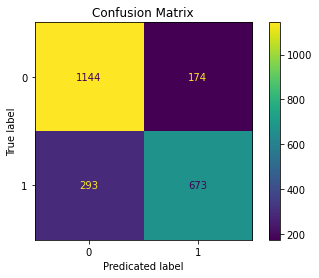

In [9]:
df = print_model_data('Count Vectorizer and Logistic Regression Stemmer',
                 model_execute(cvect_lr_pipe,X_train,y_train),
                 cvect_lr_pipe,
                 X_train,
                 X_test,
                 y_train,
                 y_test,
                 False)
df

In [10]:
X_train,X_test,y_train,y_test=data_cleanup_for_balancer_stemmer(X)

In [11]:
Xb_train, yb_train = class_balancer(X_train,y_train)

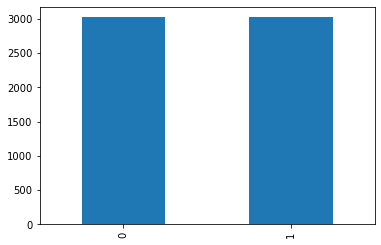

In [12]:
bar_plot(yb_train)

In [13]:
Xb_test, yb_test = class_balancer(X_train,y_train)

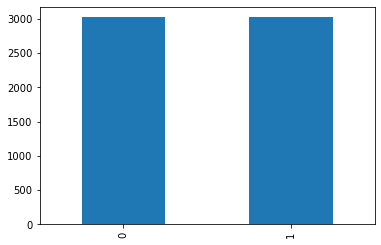

In [14]:
bar_plot(yb_test)

/Users/achandrasekhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,best_params,best_score,best_time,accuracy_score,roc_auc_score
0,Count Vectorizer and Logistic Regression Stemmer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.795534,1.465284,0.795534,0.782335
1,Count Vectorizer and Logistic Regression Stemmer,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}",0.969081,1.153519,0.969081,0.969081


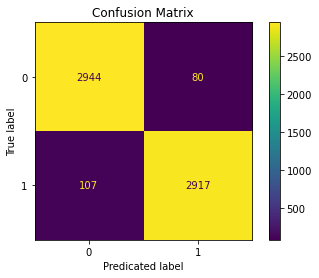

In [15]:
lr = LogisticRegression()
df = print_model_data('Count Vectorizer and Logistic Regression Stemmer',
                 model_execute(lr,Xb_train,yb_train),
                 lr,
                 Xb_train,
                 Xb_test,
                 yb_train,
                 yb_test,
                 False)
df

In [16]:
max_iter=[1,10,1000]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
params = dict(solver=solvers,penalty=penalty,C=c_values)

In [17]:
lr=LogisticRegression(max_iter=1000)
grid = GridSearchCV(lr,param_grid=params)

,model,best_params,best_score,best_time,accuracy_score,roc_auc_score
0,Count Vectorizer and Logistic Regression Stemmer,"{'memory': None, 'steps': [('transformer', CountVectorizer(stop_words='english')), ('model', LogisticRegression(max_iter=1000))], 'verbose': False, 'transformer': CountVectorizer(stop_words='english'), 'model': LogisticRegression(max_iter=1000), 'transformer__analyzer': 'word', 'transformer__binary': False, 'transformer__decode_error': 'strict', 'transformer__dtype': <class 'numpy.int64'>, 'transformer__encoding': 'utf-8', 'transformer__input': 'content', 'transformer__lowercase': True, 'transformer__max_df': 1.0, 'transformer__max_features': None, 'transformer__min_df': 1, 'transformer__ngram_range': (1, 1), 'transformer__preprocessor': None, 'transformer__stop_words': 'english', 'transformer__strip_accents': None, 'transformer__token_pattern': '(?u)\b\w\w+\b', 'transformer__tokenizer': None, 'transformer__vocabulary': None, 'model__C': 1.0, 'model__class_weight': None, 'model__dual': False, 'model__fit_intercept': True, 'model__intercept_scaling': 1, 'model__l1_ratio': None, 'model__max_iter': 1000, 'model__multi_class': 'auto', 'model__n_jobs': None, 'model__penalty': 'l2', 'model__random_state': None, 'model__solver': 'lbfgs', 'model__tol': 0.0001, 'model__verbose': 0, 'model__warm_start': False}",0.795534,1.465284,0.795534,0.782335
1,Count Vectorizer and Logistic Regression Stemmer,"{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}",0.969081,1.153519,0.969081,0.969081
2,Count Vectorizer and Logistic Regression Stemmer,"{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 1000, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(max_iter=1000), 'n_jobs': None, 'param_grid': {'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}",0.996032,76.533337,0.996032,0.996032


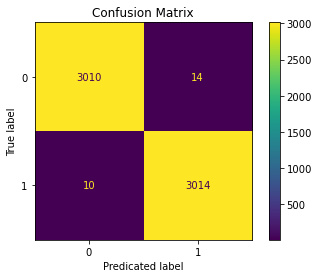

In [18]:
df = print_model_data('Count Vectorizer and Logistic Regression Stemmer',
                 model_execute(grid,Xb_train,yb_train),
                 grid,
                 Xb_train,
                 Xb_test,
                 yb_train,
                 yb_test,
                 False)
df

In [20]:
live_tweets = get_live_tweets()
live_tweets['pred']=cvect_lr_pipe.predict(live_tweets['tweets'])
live_tweets

,tweets,pred
0,RT @_pr3ttysavag3: script was wild that day\n\n*kun and haechan getting complimented for their cooking skills*\n\nkun leaves for three seconds…,0
1,Girls with fire tweets are never really pretty 😭,0
2,RT @CSK_Zealots: Chinna Thala fire fire 🔥🔥!!\n\n@ImRaina | #RoadSafety https://t.co/LO1OJvejMO,0
3,RT @sadiqmansir52: @ManGoneCrypto1 @MetaBeatOffl MetaBeat will spread like wild fire Even the blind will see MetBeat and hop on 🚀🚀\n#MetaBea…,1
4,RT @SnoCo_DEM: Bolt Creek Fire evacuation update:\n•GO- Level 3: Index. LEAVE NOW!\n•SET- Level 2: between Zeke’s and Index. Be prepared to e…,1
5,How a job want you to give them a 2 weeks notice but don’t give you a two weeks notice when they wanna fire yo ass 😂🤔 ? How that work lol,0
6,"RT @iReadBookTours: A classic story of love, loss, transformation &amp; redemption, THE ADVENTURES OF RUSTY THE FORGOTTEN FIRE ENGINE tells the…",0
7,"I touch your lips and all at once the sparks go flying. Those devil lips that know so well the art of lying. And though I see the danger, still the flame grows higher! I know I must surrender to your kiss of fire.",0
8,RT @smokingmusket: I admire Scott Frost's commitment to forcing Nebraska to fire him before his buyout drops.\n\nNext week he should run out…,0
9,RT @TansuYegen: Awesome drawing with fire on wood👏\nArtist: @Alexpeter_idoko https://t.co/XS8uTp04WJ,0
